## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv('housing.csv')
df_sk = df.dropna().copy()
df_sk = pd.get_dummies(df_sk, columns=['ocean_proximity'])
df_sk.reset_index(inplace=True)
df_sk.drop(columns='index', inplace=True)
# df_sk

In [3]:
# Separar features e target
X = df_sk.drop('median_house_value', axis=1)
y = df_sk['median_house_value']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

n_minimo,2,3,4,5,6,7,8,9,10,11,12,13,14,15
profundidade,,,,,,,,,,,,,,
2,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842,0.487842
3,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908,0.561908
4,0.597845,0.597041,0.597845,0.597845,0.597041,0.597845,0.597845,0.597041,0.597041,0.597845,0.597041,0.597041,0.597041,0.597845
5,0.619547,0.620362,0.619547,0.621322,0.619547,0.621292,0.621021,0.621857,0.621857,0.621908,0.621908,0.621984,0.621984,0.621185
6,0.650616,0.651228,0.652893,0.652627,0.655791,0.654045,0.655959,0.655924,0.654776,0.654830,0.654703,0.655642,0.655288,0.654102
7,0.677722,0.678784,0.682835,0.685178,0.689763,0.688180,0.690016,0.689794,0.689681,0.688351,0.688336,0.687762,0.687384,0.686950
8,0.697972,0.699280,0.701170,0.698747,0.705890,0.704862,0.705519,0.704848,0.706086,0.707497,0.706946,0.706502,0.706790,0.703843
9,0.710687,0.711594,0.720977,0.720368,0.724518,0.726230,0.725606,0.726108,0.724541,0.726821,0.725941,0.724816,0.723997,0.720951
10,0.720647,0.721556,0.724086,0.725716,0.727549,0.729740,0.730571,0.732903,0.731090,0.733182,0.733387,0.731000,0.730583,0.730284


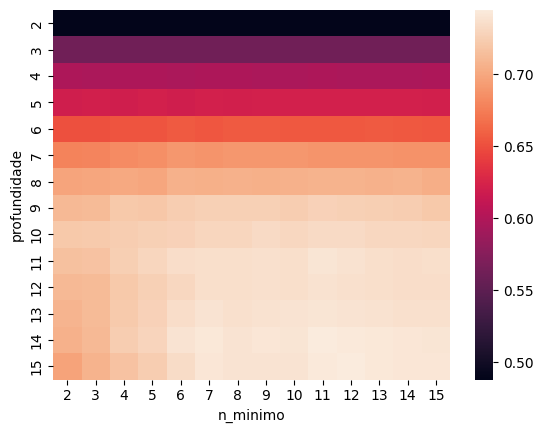

In [5]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 16):
    for j in range(2, 16):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [6]:
# regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=6)

# regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
# y_pred_reg_2 = regr_1.predict(X_train)
y_pred_reg_8 = regr_2.predict(X_train)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 9.24782799e+04, 1.86646865e+05, 1.92490238e+05,
        1.99596725e+05, 2.01510807e+05, 2.45840536e+05, 2.48027544e+05,
        2.77920316e+05, 2.94590861e+05, 3.49357121e+05, 4.56868160e+05,
        4.62065287e+05, 5.40710860e+05, 5.45016330e+05, 5.70437796e+05,
        5.96932318e+05, 6.19948574e+05, 6.65727809e+05, 6.76130706e+05,
        6.89032376e+05, 7.15097281e+05, 7.28785319e+05, 7.40475483e+05,
        7.79400783e+05, 7.90150000e+05, 9.53788186e+05, 1.02665887e+06,
        1.11595168e+06, 1.17276595e+06, 1.18444065e+06, 1.18505755e+06,
        1.21200322e+06, 1.26197659e+06, 1.29176436e+06, 1.30516813e+06,
        1.37826031e+06, 1.40890728e+06, 1.41187643e+06, 1.49812698e+06,
        1.50318979e+06, 1.52861938e+06, 1.54520893e+06, 1.57745098e+06,
        1.58427831e+06, 1.67678261e+06, 1.68336415e+06, 1.76474353e+06,
        1.82876115e+06, 1.90854686e+06, 1.91936383e+06, 1.94128640e+06,
        2.02848216e+06, 2.09800443e+06, 2.16760961

Text(0, 0.5, 'Impureza total das folhas')

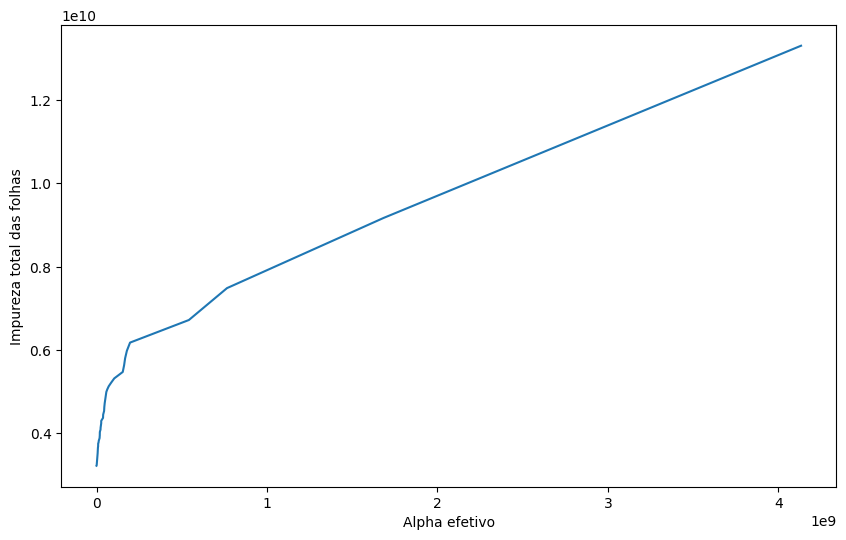

In [9]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(max_depth=8, min_samples_leaf=6, random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

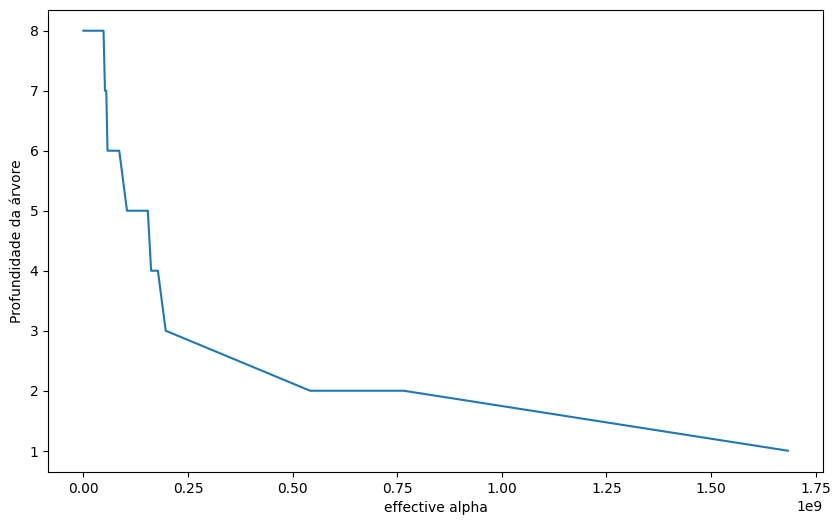

In [11]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [12]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]



### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

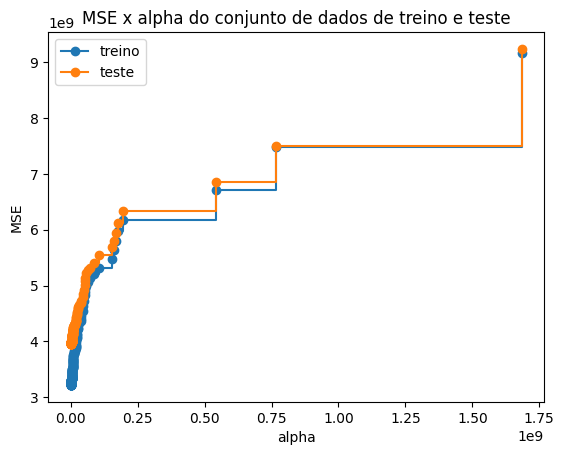

In [13]:

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [14]:
regr_atividade = DecisionTreeRegressor(max_depth=8, min_samples_leaf=6, random_state=100, ccp_alpha=0*10**9)
regr_atividade.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0


In [15]:
print(f'R-quadrado da arvore de treino: {regr_atividade.score(X_train, y_train):.4f}')
print(f'R-quadrado da arvore de teste: {regr_atividade.score(X_test, y_test):.4f}')
print(f'\nMSE da arvore de treino: {mean_squared_error(y_train, regr_atividade.predict(X_train))/10**9}')
print(f'MSE da arvore de teste: {mean_squared_error(y_test, regr_atividade.predict(X_test))/10**9}')


R-quadrado da arvore de treino: 0.7578
R-quadrado da arvore de teste: 0.7039

MSE da arvore de treino: 3.222043707041817
MSE da arvore de teste: 3.962449767446188


Eu dividi o valor mostrado do MSE por 10 elevado a 9 para igualizar o valor mostrado no grafico anterior, melhorando a interpretação

### 7. Visualize esta árvore.

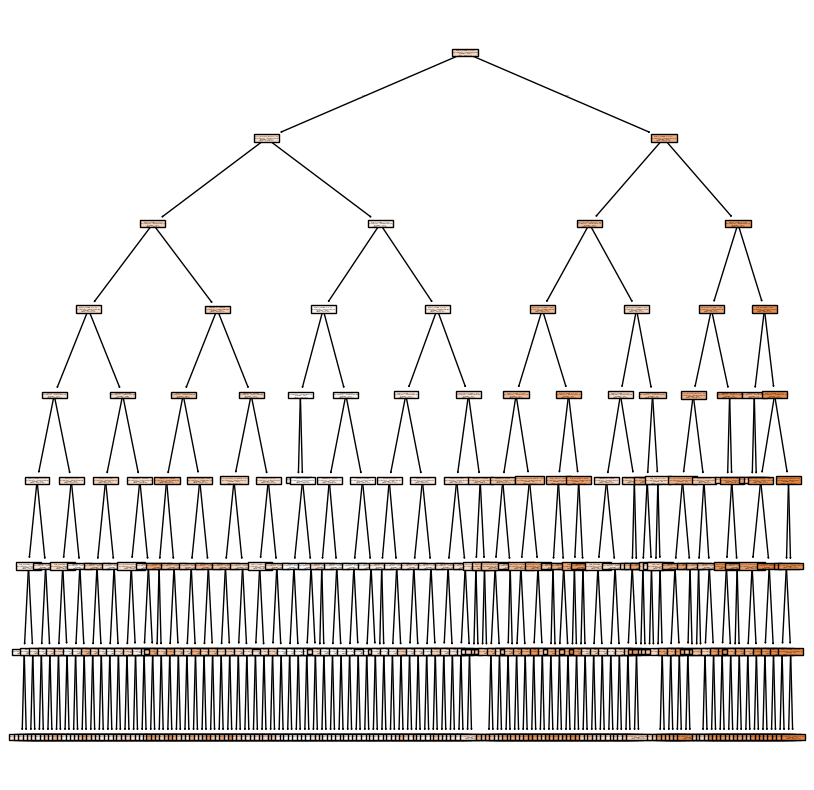

In [16]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_atividade, 
                    feature_names=X.columns,  
                    filled=True) 